In [1]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

import SimpleITK as sitk

from google.colab.patches import cv2_imshow

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


def imshow(img):
  return cv2_imshow(img)

In [4]:
def normalize_intensity(image, scale_min=0, scale_max=255):
  # Calculate the minimum and maximum of the image
  img_min = np.min(image)
  img_max = np.max(image)

  # Normalize the image
  normalized_image = (image - img_min) / (img_max - img_min) * (scale_max - scale_min) + scale_min

  return normalized_image

# Define path of the subsets

In [5]:
path = os.path.join(os.getcwd(), "drive", "MyDrive", "projects", "ML IA", "LUNA16")

path_subsets = os.path.join(path, "subsets") # path for subsets folder
subsets = os.listdir(path_subsets) # subset folders present

# Dictionary of DICOM images


In [6]:
image_dict = {}

In [7]:
read_in_num = 5

subset_path = lambda subset: os.path.join(path_subsets, subset)
file_path = lambda subset, filename: os.path.join(path_subsets, subset, filename)

for i, subset in enumerate(subsets):
  # Create subset key if it doesn't exist
  if subset not in image_dict:
    image_dict[subset] = {}

  # Iterate through all the keys in the subset
  read_in = 0
  for j, filename in enumerate(os.listdir(subset_path(subset))):
    if j < 8: continue # Do not read in before the third file (they have annotations)

    name, extension = os.path.splitext(filename) # Separate filename and extension

    # Only take .mhd files into consideration (sitk finds the corresponding .raw)
    if extension == ".mhd":
      # Only read if there is missing information
      if name not in image_dict[subset]:
        print(f"[START] -- READING IN: {subset}/{name}")
        image = sitk.ReadImage(os.path.join(path_subsets, subset, filename))

        image_dict[subset][name] = image
        print(f"[DONE] -- READING IN: {subset}/{name}")

      else:
        print(f"[SKIP] -- ALREADY EXISTS: {subset}/{name}")
        continue

      read_in += 1 # Increment file-read-in counter
      if read_in >= read_in_num: break # If desired read-ins are reached for loop is broken in the subset

  print(f"[STATUS] -- READ IN {read_in_num} entries in {subset}")


subset_keys = list(image_dict.keys()) # Extract the stored subset-keys
filename_keys = [list(image_dict[key].keys()) for key in subset_keys] # Extract the stored filename-keys
filename_keys_flat = [*filename_keys[0], *filename_keys[1],] # Flatten the stored filename-keys

print(f"\n")
print(f"Subset keys: {subset_keys}")
print(f"Subset lengths: {[len(image_dict[key]) for key in subset_keys]}")
print(f"Filename keys: {filename_keys_flat}")

[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950
[STATUS] -- READ IN 5 entries in subset0
[STA

## Function to get DICOM image by uid

In [8]:
def find_by_uid(uid):
  dictionary = image_dict # Search in 'image_dict'

  keys = list(dictionary.keys())
  for key in keys:
    if uid in dictionary[key]:
      return dictionary[key][uid]

  # If no uid is found None is returned
  print(f"NO {uid} UID")
  return None

def get_uids():
  uids = []
  dictionary = image_dict # Search in 'image_dict'
  keys = list(dictionary.keys())

  for key in keys:
    for uid in dictionary[key]:
      uids.append(uid)

  return uids

def subset_by_uid(uid):
  dictionary = image_dict # Search in 'image_dict'

  for key in list(dictionary.keys()):
    if filename in dictionary[key]:
      return key
  print(f"NO {uid} UID")
  return None

def img_by_uid(uid):
  img = find_by_uid(uid)
  return sitk.GetArrayFromImage(img)

def meta_by_uid(uid):
  img = find_by_uid(uid)
  return img.GetOrigin(), img.GetSpacing()

find_by_uid("1.3.6.1.4.1.14519.5.2.1.6279.6001.111017101339429664883879536171")
get_uids()

['1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.111017101339429664883879536171',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.113697708991260454310623082679',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.121824995088859376862458155637',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.128059192202504367870633619224']

In [9]:
ss_i = 0
fn_i = 0

ss_k = subset_keys[ss_i]
fn_k = filename_keys[ss_i][fn_i]

# LUNG SEGMENTATION function

In [10]:
def process_slices(image, axis_index, func):
    """
    Process all the slices of a 3D image along a specified axis using a given function.

    Parameters:
        image (numpy.ndarray): The input 3D image.
        axis_index (int): The index of the axis along which to iterate (0 for x, 1 for y, 2 for z).
        func (callable): The function to apply to each slice.

    Returns:
        numpy.ndarray: The modified image.
    """
    # Ensure axis_index is within valid range
    if axis_index < 0 or axis_index > 2:
        raise ValueError("Axis index must be 0, 1, or 2.")

    # Iterate over slices along the specified axis
    for idx in range(image.shape[axis_index]):
        # Extract the slice along the specified axis
        if axis_index == 0:
            slice_ = image[idx, :, :]
        elif axis_index == 1:
            slice_ = image[:, idx, :]
        else:
            slice_ = image[:, :, idx]

        # Apply the function to the slice
        modified_slice = func(slice_)

        # Update the slice in the original image
        if axis_index == 0:
            image[idx, :, :] = modified_slice
        elif axis_index == 1:
            image[:, idx, :] = modified_slice
        else:
            image[:, :, idx] = modified_slice

    return image

# Example usage:
# Define a function to apply to each slice (e.g., scaling)
def test(slice_):
    print(slice_.shape)
    return slice_ * 2  # Just a simple example, you can replace this with any function

# Create a sample 3D image
image = np.random.rand(3, 4, 5)

# Process slices along axis 0 (x-axis in this case) using the scale_slice function
processed_image = process_slices(image, 0, test)


(4, 5)
(4, 5)
(4, 5)


In [11]:
from skimage.segmentation import clear_border
from scipy.ndimage import binary_fill_holes, binary_closing, binary_dilation, binary_opening, binary_erosion
from skimage import measure, morphology
from skimage.segmentation import clear_border
from scipy.ndimage import median_filter

def unwanted_object_filter(img: np.ndarray) -> np.ndarray:
  closed = binary_closing(img, morphology.disk((3)))

  # Label connected components
  labels = measure.label(closed)
  properties = measure.regionprops(labels)

  # Sort regions by area and keep the two largest
  detected_objects = sorted(properties, key=lambda x: x.area, reverse=True)

  # Filter out the relevant sizes
  area_th = 50
  detected_objects = [obj for obj in detected_objects if obj.area > area_th]

  # Case when more than 4 detected object
  if len(detected_objects) >= 4:
    detected_objects = detected_objects[:4]

    # 4th largest object is significantly smaller then the 3rd
    if detected_objects[2].area * 0.1 > (detected_objects[3].area):
        detected_objects = detected_objects[:3]

    # 3rd largest object is significantly smaller then the 2nd
    if detected_objects[1].area * 0.5 > (detected_objects[2].area):
      detected_objects = detected_objects[:2]

  # Case when there is only 3 detected objects
  elif len(detected_objects) == 3:
    # 3rd largest object is significantly smaller then the 2nd
    if detected_objects[1].area * 0.1 > (detected_objects[2].area):
      detected_objects = detected_objects[:2]

  # Create an empty image to hold the result
  filtered_image = np.zeros_like(img, dtype=np.uint8)

  # Fill in the regions of the two largest objects
  for prop in detected_objects:
      filtered_image[labels == prop.label] = 255

  return filtered_image


def closing(img):
  closed = binary_closing(img, morphology.disk((5)))
  return closed


def dilate(img):
  dilated = binary_dilation(img, morphology.disk((3)))
  return dilated

def erosion(img):
  eroded = binary_erosion(img, morphology.disk((3)))
  return eroded

def opening(img):
  opened = binary_opening(img, morphology.disk((3)))
  return opened


def gaussian_blur(img):
  kernel_size = 5
  blur = img.copy()

  needs_0_shift = img.min() < 0
  if needs_0_shift:
    blur = blur + img.min()

  blur = cv.GaussianBlur(img, (kernel_size, kernel_size), 0) # apply blur

  if needs_0_shift:
    blur = blur - img.min()

  return blur

def median_blur(img, ksize=5):
  return cv.medianBlur(img, ksize=ksize)


air_th = -1200 # HU th specified by findings in the sources
lung_th = -500 # HU th specified by findings in the sources

def lung_mask(img: np.ndarray, verbose=True):
  """
  Extraction function for lung ROI (2D and 3D)

  - thresholding using HU for air filled organs
  - clearing info outside of the subject body
  - dilation and filling of the ROI (lung area)
  """

  # 3D
  if len(img.shape) == 3:

    # Denoising
    if verbose:
      print(f"[PROC] - DENOISING")
    denoised = np.vectorize(median_blur, signature="(n,m)->(n,m)")(img)

    # Thresholding
    if verbose:
      print(f"[PROC] - THRESHOLDNG")
    bin = denoised <= lung_th
    bin[bin < air_th] = air_th

    th = bin.astype(np.uint8) * 255 # normalizing to 0 and 255 values (unsigned 8-bit int) !NOTE!: this might be an unneded line

    if verbose:
      print(f"[PROC] - CLEARING BORDER ON Z-AXIS")
    th = np.vectorize(clear_border, signature="(n,m)->(n,m)")(th) # remove border

    if verbose:
      print(f"[PROC] - OBJECT FILTERING ON Z-AXIS")
    th = np.vectorize(unwanted_object_filter, signature="(n,m)->(n,m)")(th) # remove small objects

    # th = np.vectorize(closing, signature="(n,m)->(n,m)")(th) # remove small holes and edge smoothing

    for i in range(2):
      if verbose:
        print(f"[PROC] - FILLING HOLES on AXIS-{i}")
      if i: # Don't run on Z axis
        th = process_slices(th, i, binary_fill_holes)


      if verbose:
        print(f"[PROC] - CLOSING on AXIS-{i}")
      th = process_slices(th, i, closing)




  # 2D NOTE: WIP
  elif len(img.shape) == 2:

    # Denoising
    if verbose:
      print(f"[PROC] - DENOISING")
    denoised = median_blur(img)

    # Thresholding
    if verbose:
      print(f"[PROC] - THRESHOLDNG")
    bin = denoised <= lung_th
    bin[bin < air_th] = air_th

    # Normalize
    th = bin.astype(np.uint8) * 255 # normalizing to 0 and 255 values (unsigned 8-bit int) !NOTE!: this might be an unneded line

    # Clear border
    if verbose:
      print(f"[PROC] - CLEARING BORDER ON Z-AXIS")
    th = clear_border(th) # remove border

    if verbose:
      print(f"[PROC] - OBJECT FILTERING ON Z-AXIS")
    th = unwanted_object_filter(th) # remove small objects

    for i in range(2):
      if verbose:
        print(f"[PROC] - FILLING HOLES on AXIS-{i}")
      if i: # Don't run on Z axis
        th = binary_fill_holes(th)

      if verbose:
        print(f"[PROC] - CLOSING on AXIS-{i}")
      th = closing(th)

  return th

def lung_mask_by_uid(uid):
  return lung_mask(img_by_uid(uid),)

# ANNOTATION MASKS function

## Draw ellipsoid on binary image

In [12]:
def draw_ellipsoid(mask, center, diameters, zyx=True):
    """
    Draws ellipsioid with custom diameters on a 3D image
    NOTE: center coordinates are in (z,y,x) order by default
    """
    # Extract the diameters for each axis
    if zyx:
      dz, dy, dx = diameters
    else:
      dx, dy, dz = diameters

    # Calculate the radii for each axis
    rz, ry, rx = dz / 2, dy / 2, dx / 2

    # Extract the shape of the array
    zmax, ymax, xmax = mask.shape

    # Get the range of indices to iterate over (stay within the array bounds)
    z_start, z_end = max(0, center[0]-int(rz)), min(zmax, center[0]+int(rz)+1)
    y_start, y_end = max(0, center[1]-int(ry)), min(ymax, center[1]+int(ry)+1)
    x_start, x_end = max(0, center[2]-int(rx)), min(xmax, center[2]+int(rx)+1)

    # Iterate over each point in the bounding box of the ellipsoid
    for z in range(z_start, z_end):
        for y in range(y_start, y_end):
            for x in range(x_start, x_end):
                # Calculate the normalized distance from the current point to the center
                if (((x - center[2])**2 / rx**2) + ((y - center[1])**2 / ry**2) + ((z - center[0])**2 / rz**2)) <= 1:
                    mask[z, y, x] = 1  # Set the value inside the ellipsoid


def create_3d_mask(center, diameters, img=np.zeros((28,28,28))):
  mask = np.zeros_like(img)
  draw_ellipsoid(mask, center, diameters)
  return mask

## Load Anntations into DataFrame

## Filtering out anotations without loaded data

In [13]:
annotations_df = pd.read_csv(os.path.join(path, "annotations.csv"))

current_files = [key for keys in filename_keys for key in keys]

filtered_df = annotations_df[annotations_df["seriesuid"].isin(current_files)]

How many annotations do we have for the cases (the ones that don't have any are not present)

## Annotation helper for case id

In [14]:
def annotations_by_uid(uid):
    # Getting annotations for case
    mask = annotations_df['seriesuid'] == uid
    return annotations_df[mask]

# annotations_by_uid("1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343")

 ## Create mask with annotation ellipsoids

In [15]:
def create_annotations_mask(origin, spacing, annotations:pd.DataFrame, image:np.ndarray, verbose=False):
  """
  Creates 3D mask for annotations and provided metadata and CT scan case
  """
  centers = []
  diameters = []

  # If there is no given annotations
  if not len(annotations):
    return np.zeros_like(image, dtype=np.uint8), []


  # Iterate thorugh the annotations
  annotation_i = 0 # Toggle mask creation in the first iteration
  for i, row in annotations.iterrows():
    world_coords = np.array([row['coordX'], row['coordY'], row['coordZ']]) # Coordinates of the device
    pixel_coords = np.round((world_coords - origin) / spacing).astype(int) # Translated coordinates into voxelspace

    diam = row["diameter_mm"] # Diameter scalar
    diams = np.rint(diam / np.array(spacing)) # Diameters scaled by spacing (x, y, z)

    # Flipping axes: (x, y, z) -> (z, y, x)
    v_center = np.array([pixel_coords[2], pixel_coords[1], pixel_coords[0],]) # nodule center in voxel space (z,y,x ordering)
    v_diameters = np.array([diams[2], diams[1], diams[0],]) # flipping to (z, y, x)

    centers.append(v_center)
    diameters.append(v_diameters)


    # Adding annotations to the mask
    if annotation_i == 0:
      if verbose:
        print(f"[ANNOTATION #{annotation_i + 1}] -- Create image mask")

      mask = create_3d_mask(v_center, v_diameters, image)
      annotation_i += 1
    else:
      if verbose:
        print(f"[ANNOTATION #{annotation_i + 1}] -- Adding annotation #{annotation_i + 1}, index: {i}")

      draw_ellipsoid(mask, v_center, v_diameters)
      annotation_i += 1

    if verbose:
      z, y, x = image.shape
      print(f"Row index: {i}")
      print(f"Slices: Z: {z}, Y: {y}, X: {x}")
      print(f"Origin : {origin}")
      print(f"Spacing : {spacing}")
      print(f"V-center: {v_center}")
      print(f"Diameter: {diam}")
      print(f"V-diameters: {v_diameters}")

  return mask, np.array(centers)


def create_annotations_mask_by_id(uid, verbose=False):
  origin, spacing = meta_by_uid(uid)
  annotations = annotations_by_uid(uid)
  img = img_by_uid(uid)

  return create_annotations_mask(origin, spacing, annotations, img, verbose)

____________________________________________________
# PREPARE TO TEST

## Display functions

In [16]:
def draw_mask_outline(grayscale_img, binary_mask):
  """
  Function to display masked out area on a greyscale image
  """
  # Ensure the input grayscale image is in 3 channels (RGB)
  if len(grayscale_img.shape) == 2:
      grayscale_img = cv.cvtColor(normalize_intensity(grayscale_img).astype(np.uint8), cv.COLOR_GRAY2RGB)

  # Find contours from the binary mask
  contours, _ = cv.findContours(binary_mask, cv.RETR_FLOODFILL, cv.CHAIN_APPROX_SIMPLE)

  # Draw contours on the grayscale image in red color
  outline_color = (255, 0, 0)  # Red in BGR format
  cv.drawContours(grayscale_img, contours, -1, outline_color, 1)

  return grayscale_img

In [17]:
def show_3_images(images, cmap="gray"):
  """
  Show 3 images in 1 row
  """
  fig, axes = plt.subplots(1, 3, figsize=(21, 7))

  #fig.tight_layout()

  axes[0].imshow(images[0], cmap=cmap)
  axes[1].imshow(images[1], cmap=cmap)
  axes[2].imshow(images[2], cmap=cmap)

  return fig, axes

In [18]:
def annotation_steps(original, lung_mask, annotation_mask, normalize=True):
  """
  Returns the outlined images of where the masking takes place
  """
  lung_mask = lung_mask.astype(np.int32)
  annotation_mask = annotation_mask.astype(np.int32)
  lung_masked = original.copy()
  annotation_masked = original.copy()

  # 1. Lung segmentation
  if normalize:
    original = normalize_intensity(original)
  drawn_lung_segmentation = draw_mask_outline(original, lung_mask)

  # 2 Annotation segmentation
  lung_masked = lung_mask * lung_masked
  lung_masked[lung_mask == False] = lung_masked.min()
  if normalize:
    lung_masked = normalize_intensity(lung_masked)
  drawn_annotation = draw_mask_outline(lung_masked, annotation_mask)

  # 3. Masking out annotation
  annotation_masked = annotation_mask * annotation_masked
  annotation_masked[annotation_mask == False] = annotation_masked.min()
  if normalize:
    annotation_masked = normalize_intensity(annotation_masked)

  return drawn_lung_segmentation, drawn_annotation, annotation_masked

# TESTING SEGMENTATION AND ANNOTATIONS



## SELECT CASE

In [19]:
print(filtered_df["seriesuid"].value_counts())
print(np.array(get_uids()))

seriesuid
1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343    3
1.3.6.1.4.1.14519.5.2.1.6279.6001.121824995088859376862458155637    2
1.3.6.1.4.1.14519.5.2.1.6279.6001.128059192202504367870633619224    2
1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950    1
Name: count, dtype: int64
['1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.111017101339429664883879536171'
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.113697708991260454310623082679

In [20]:
uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.128059192202504367870633619224" # case id
og_img = img_by_uid(uid) # original image

## Binarize lung

In [21]:
segmented = lung_mask_by_uid(uid).astype(bool) # lung segmentation mask (boolean)

[PROC] - DENOISING
[PROC] - THRESHOLDNG
[PROC] - CLEARING BORDER ON Z-AXIS
[PROC] - OBJECT FILTERING ON Z-AXIS
[PROC] - FILLING HOLES on AXIS-0
[PROC] - CLOSING on AXIS-0
[PROC] - FILLING HOLES on AXIS-1
[PROC] - CLOSING on AXIS-1


## Masking out the segmented lung

In [22]:
masked = og_img.copy()
masked[segmented == False] = masked.min() # Setting unsegmented voxels to minimum value for masking

## Extracting annotations dataframe

In [23]:
annotations_mask, centers = create_annotations_mask_by_id(uid) # create 3D annotation mask (z,y,x)
print(f"Annotation centers (z, y, x):\n{centers}")

Annotation centers (z, y, x):
[[ 96 221 351]
 [ 42 279 376]]


# Review of TESTS


## Binary masks

### Slider through masks along z-axis

Centers: [96 42]


interactive(children=(IntSlider(value=69, description='slice_index', max=139), Output()), _dom_classes=('widge…

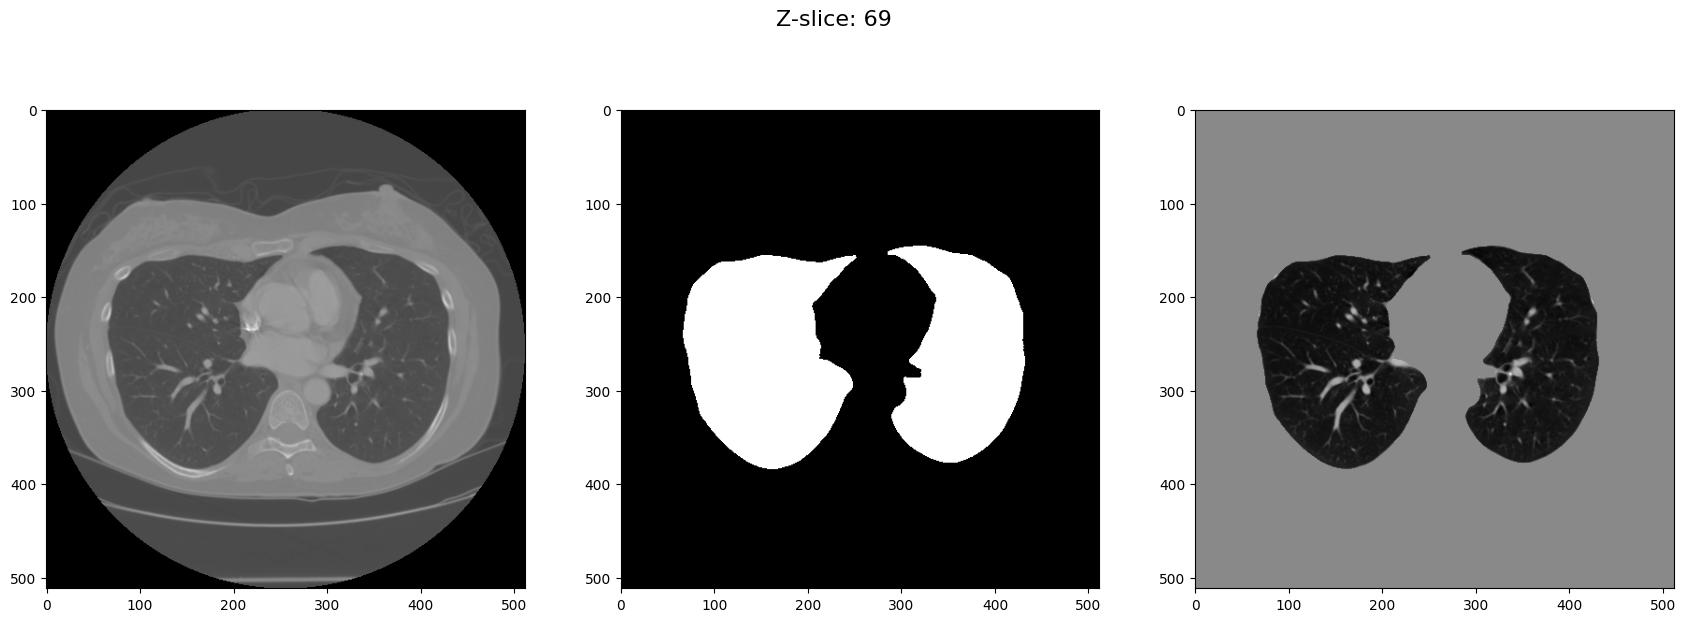

In [24]:
axis = 0 # index of axis (0,1,2) ~ (z,y,x)

print(f"Centers: {centers[:,axis]}")

slices = segmented.shape[axis]
figsize = (21, 7)

@interact
def show_slice(slice_index=(0,slices-1,1)):

  a,b,c = og_img[slice_index,:,:], segmented[slice_index,:,:], og_img[slice_index,:,:] * segmented[slice_index,:,:]
  fig, axes = show_3_images([a,b,c])
  fig.suptitle(f'Z-slice: {slice_index}', fontsize=16)


## Masking steps

### Z axis

Centers: [96 42]


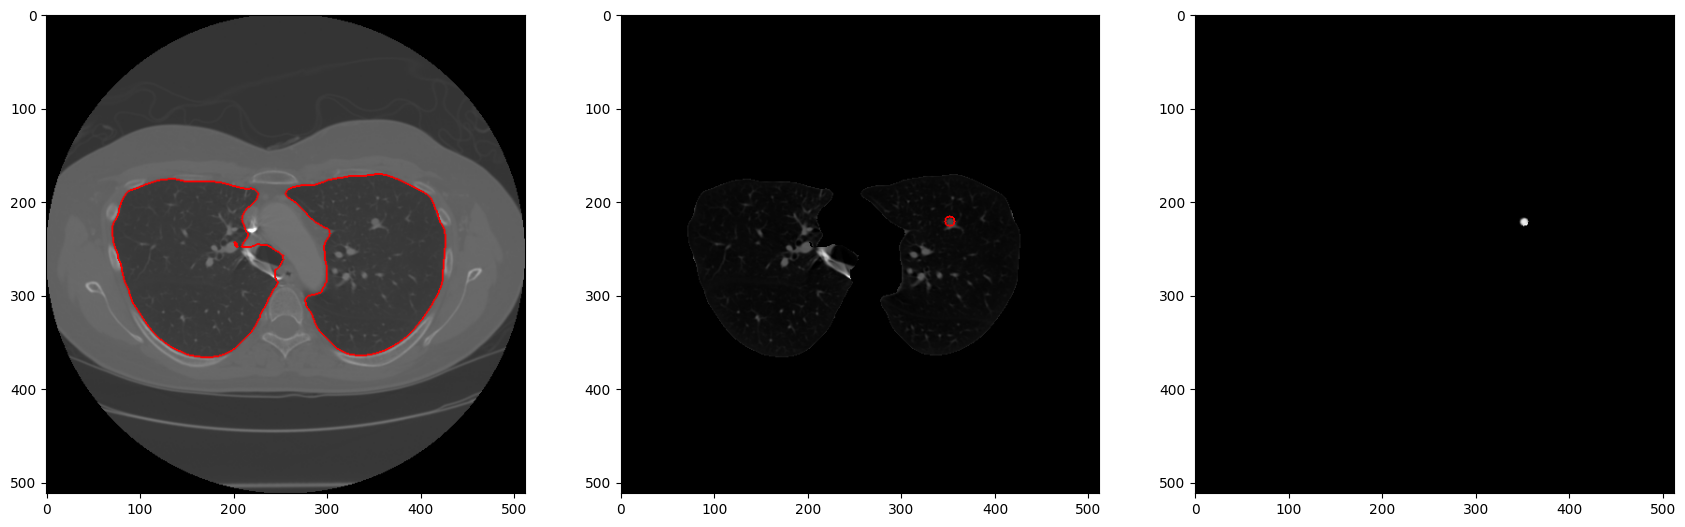

In [25]:
axis = 0 # index of axis (0,1,2) ~ (z,y,x)
center_i = 0 # index of the displayed annotation

print(f"Centers: {centers[:,axis]}")

slices = segmented.shape[axis]
slice_index = centers[center_i, axis]

slice_index = centers[center_i,axis]

ma = segmented[slice_index,:,:].copy()
a_ma = annotations_mask[slice_index,:,:].copy()
im =  og_img[slice_index,:,:].copy()

fig, axs = show_3_images(annotation_steps(im,ma,a_ma, normalize=False))

### Y axis

Centers: [221 279]


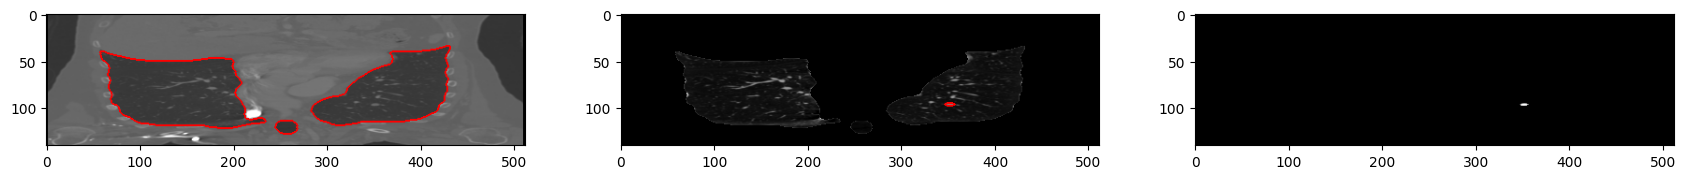

In [26]:
axis = 1 # index of axis (0,1,2) ~ (z,y,x)
center_i = 0

print(f"Centers: {centers[:,axis]}")

slices = segmented.shape[axis]

slice_index = centers[center_i, axis]

ma = segmented[:,slice_index,:].copy()
a_ma = annotations_mask[:,slice_index,:]
im =  og_img[:,slice_index,:].copy()

fig, axs = show_3_images(annotation_steps(im,ma,a_ma))

### X axis

Centers: [351 376]


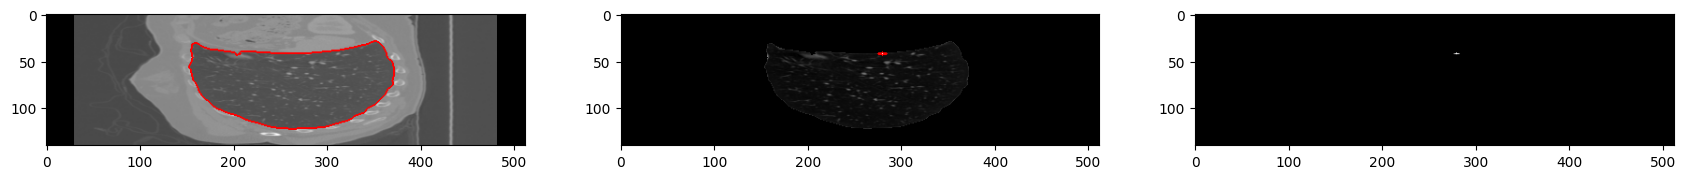

In [27]:
axis = 2 # index of axis (0,1,2) ~ (z,y,x)
center_i = 1

print(f"Centers: {centers[:,axis]}")

slices = segmented.shape[axis]
slice_index = centers[center_i, axis]


ma = segmented[:,:,slice_index].copy()
a_ma = annotations_mask[:,:,slice_index]
im =  og_img[:,:,slice_index].copy()

fig, axs = show_3_images(annotation_steps(im,ma,a_ma))

# SEGMENTATION

In [28]:
a = shuffle(get_uids())
print(get_uids())

NameError: name 'shuffle' is not defined

In [ ]:
from random import shuffle

uids = get_uids()

for uid in uids:
  print(f"UID: {uid} ({subset_by_uid(uid)})")

  og_img = img_by_uid(uid) # original image
  segmented = lung_mask_by_uid(uid).astype(bool) # lung segmentation mask (boolean)

  masked = og_img.copy()
  masked[segmented == False] = masked.min() - 1 # Setting unsegmented voxels to minimum (-1, for differenciability) value for masking

  annotations_mask, centers = create_annotations_mask_by_id(uid) # create 3D annotation mask (z,y,x)

  print("Centers:")
  print(centers)
  print("\n")


  for center in centers:
      print(f"CENTER: {center}")

      slice_index = center[0]

      ma = segmented[slice_index,:,:]
      a_ma = annotations_mask[slice_index,:,:]
      im =  og_img[slice_index,:,:]
      show_3_images(annotation_steps(im,ma,a_ma, normalize=False))

      slice_index = center[1]

      ma = segmented[:,slice_index,:]
      a_ma = annotations_mask[:,slice_index,:]
      im =  og_img[:,slice_index,:]
      show_3_images(annotation_steps(im,ma,a_ma, normalize=False))

      slice_index = center[2]

      ma = segmented[:,:,slice_index]
      a_ma = annotations_mask[:,:,slice_index]
      im =  og_img[:,:,slice_index]
      show_3_images(annotation_steps(im,ma,a_ma, normalize=False))

      plt.show()